<a href="https://colab.research.google.com/github/GuillenConcepcion/Lab_GC/blob/main/ML_Automatizaci%C3%B3n_flujo_de_trabajos_para_aprendizaje_autom%C3%A1ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Por qué automatizar la selección de modelos de ML?

Hay muchas razones, veamos algunas. Piénsalo:

* La mayoría de los conjuntos de datos se pueden modelar de múltiples maneras.
* Probar cada modelo manualmente requiere mucho tiempo.
* Elegir el modelo equivocado al principio puede hacer descarrilar su proyecto.

## La automatización le permite:
* Compare docenas de modelos al instante.
* Obtenga métricas de rendimiento sin escribir código repetitivo.
* Identifique los algoritmos de mejor rendimiento en función de la precisión, la puntuación F1 o RMSE.

https://towardsdatascience.com/how-i-automated-my-machine-learning-workflow-with-just-10-lines-of-python/



https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906/notebook

# Librerias (Libreries)

In [1]:
!pip install lazypredict
!pip install pycaret

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from pycaret.classification import *

# Carga de datos (Load)

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(url, header=None)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#¿Quiénes son los indígenas pima?

Los pima (o akimel o'odham, también escrito akimel o'otham, "pueblo del río", antes conocidos como pima) son un grupo de nativos americanos que habitan en una zona que abarca lo que hoy es el centro y sur de Arizona. La mayoría de la población de las dos bandas supervivientes de akimel o'odham reside en dos reservas: los keli akimel o'otham de la comunidad indígena del río Gila (GRIC) y los on'k akimel o'odham de la comunidad indígena pima-maricopa del río Salt (SRPMIC).

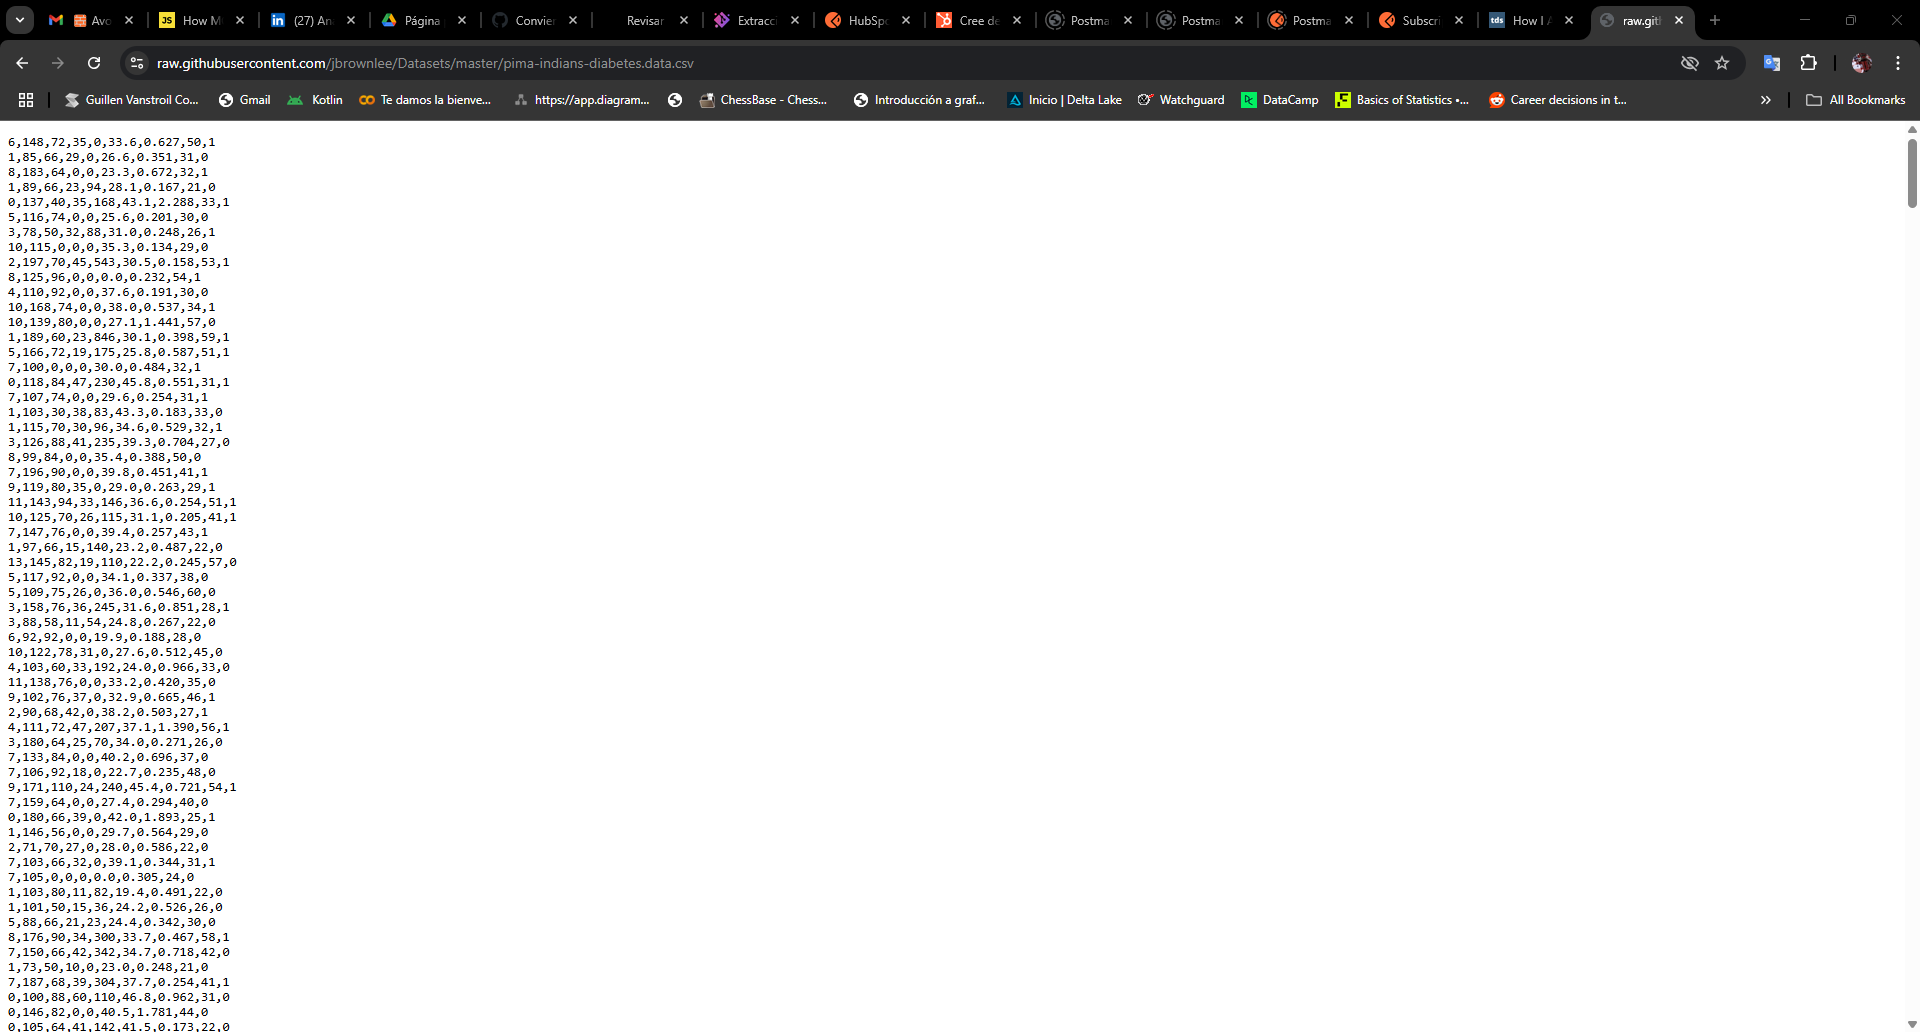

In [7]:
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [9]:
df.shape

(768, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Top 5 models
print(models.head(5))

  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

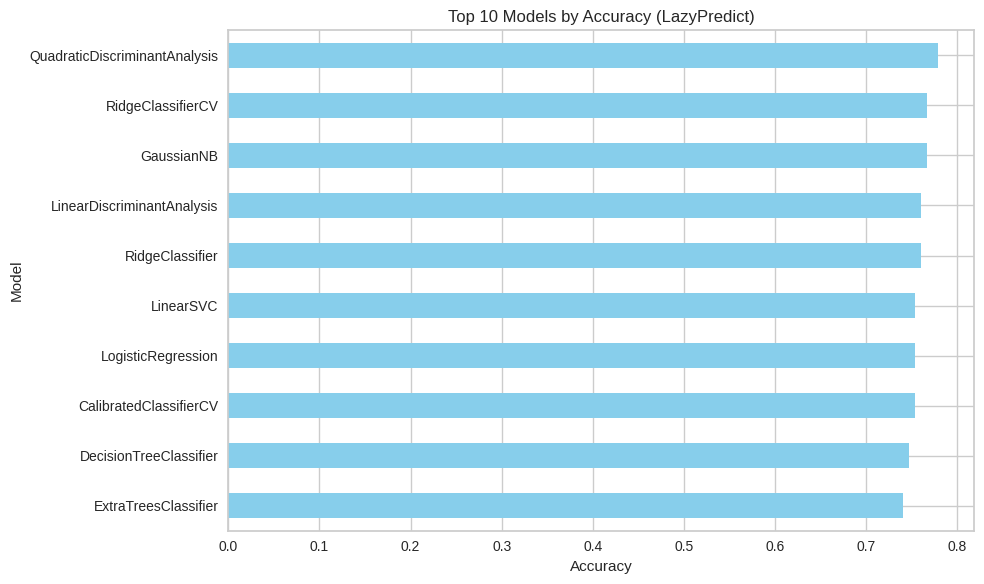

In [5]:
import matplotlib.pyplot as plt

# Assuming `models` is the LazyPredict DataFrame
top_models = models.sort_values("Accuracy", ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_models["Accuracy"].plot(kind="barh", color="skyblue")
plt.xlabel("Accuracy")
plt.title("Top 10 Models by Accuracy (LazyPredict)")
plt.gca().invert_yaxis()
plt.tight_layout()

# PyCaret

In [6]:
clf = setup(data=df, target=df.columns[-1])
best_model = compare_models()

,Description,Value
0,Session id,634
1,Target,8
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7785,0.8302,0.5883,0.7242,0.6479,0.4892,0.4956,0.8310
rf,Random Forest Classifier,0.7729,0.8289,0.6143,0.7000,0.6516,0.4845,0.4890,0.3140
lda,Linear Discriminant Analysis,0.7711,0.8304,0.5673,0.7168,0.6316,0.4694,0.4771,0.0250
ridge,Ridge Classifier,0.7693,0.8305,0.5617,0.7149,0.6274,0.4643,0.4722,0.0260
nb,Naive Bayes,0.7637,0.8184,0.6146,0.6797,0.6401,0.4659,0.4714,0.0290
lightgbm,Light Gradient Boosting Machine,0.7634,0.8246,0.6196,0.6717,0.6418,0.4663,0.4693,0.5190
gbc,Gradient Boosting Classifier,0.7598,0.8336,0.5822,0.6861,0.6264,0.4517,0.4574,0.1730
ada,Ada Boost Classifier,0.7542,0.8152,0.6310,0.6566,0.6366,0.4527,0.4583,0.1200
xgboost,Extreme Gradient Boosting,0.7467,0.8261,0.5830,0.6537,0.6139,0.4270,0.4303,0.0800
qda,Quadratic Discriminant Analysis,0.7413,0.8079,0.5623,0.6480,0.5980,0.4101,0.4149,0.0350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Casos de uso de la vida real

Algunos casos de uso reales en los que estas bibliotecas pueden ser beneficiosas son:

* Prototipado rápido en hackatones
* Paneles internos que sugieren el mejor modelo para los analistas
* Enseñar ML sin ahogarse en la sintaxis
* Pruebas previas de ideas antes de su implementación a gran escala